<a href="https://colab.research.google.com/github/DrFrank25/Syndecan_4-Ag73/blob/main/PCA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Script to PCA analysis with Python**


In [1]:
# --- Intall MDAnalysis
!pip install MDAnalysis tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00


In [2]:
# --- Import libraries ---
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tqdm import tqdm
import MDAnalysis as mda
from MDAnalysis.analysis import align

In [7]:
# === Upload GROMACS files ===
print("Please upload: step5.1_Run1.tpr, step5.1_noPBC_Run1.xtc, step5.1_Run2.tpr, step5.1_noPBC_Run2.xtc, step5.1_Run3.tpr, step5.1_noPBC_Run3.xtc")
uploaded = files.upload()

# === Define replicates ===
runs = [
    ("step5.1_Run1.tpr", "step5.1_noPBC_Run1.xtc"),
    ("step5.1_Run2.tpr", "step5.1_noPBC_Run2.xtc"),
    ("step5.1_Run3.tpr", "step5.1_noPBC_Run3.xtc")
]

coords = []

Please upload: step5.1_Run1.tpr, step5.1_noPBC_Run1.xtc, step5.1_Run2.tpr, step5.1_noPBC_Run2.xtc, step5.1_Run3.tpr, step5.1_noPBC_Run3.xtc


Saving step5.1_noPBC_Run1.xtc to step5.1_noPBC_Run1 (2).xtc
Saving step5.1_noPBC_Run2.xtc to step5.1_noPBC_Run2 (1).xtc
Saving step5.1_noPBC_Run3.xtc to step5.1_noPBC_Run3 (1).xtc
Saving step5.1_Run1.tpr to step5.1_Run1 (2).tpr
Saving step5.1_Run2.tpr to step5.1_Run2 (1).tpr
Saving step5.1_Run3.tpr to step5.1_Run3 (1).tpr


In [13]:
# === Loop over replicates ===
for tpr, xtc in runs:
    print(f"Processing {tpr}, {xtc} ...")
    u = mda.Universe(tpr, xtc)

    # Select C-alpha atoms
    ca = u.select_atoms("protein and name CA")

    # Align trajectory to the first frame
    ref = u.select_atoms("protein and name CA")
    aligner = align.AlignTraj(u, ref, select="protein and name CA", in_memory=True).run()

    # Extract coordinates
    for ts in tqdm(u.trajectory, desc=f"Frames {tpr}"):
        coords.append(ca.positions.flatten())

Processing step5.1_Run1.tpr, step5.1_noPBC_Run1.xtc ...


Frames step5.1_Run1.tpr: 100%|██████████| 1001/1001 [00:00<00:00, 73250.49it/s]


Processing step5.1_Run2.tpr, step5.1_noPBC_Run2.xtc ...


Frames step5.1_Run2.tpr: 100%|██████████| 1001/1001 [00:00<00:00, 69860.87it/s]


Processing step5.1_Run3.tpr, step5.1_noPBC_Run3.xtc ...


Exception ignored in: <function ReaderBase.__del__ at 0x7ea999190d60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/base.py", line 1531, in __del__
    self.close()
  File "/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/chain.py", line 606, in close
    self._apply('close')
  File "/usr/local/lib/python3.12/dist-packages/MDAnalysis/coordinates/chain.py", line 513, in _apply
    return [reader.__getattribute__(method)(**kwargs) for reader in self.readers]
                                                                    ^^^^^^^^^^^^
AttributeError: 'ChainReader' object has no attribute 'readers'
Frames step5.1_Run3.tpr: 100%|██████████| 965/965 [00:00<00:00, 48171.95it/s]


In [14]:
# === Convert to numpy array ===
X = np.array(coords)
X -= X.mean(axis=0)  # mean-center the data


In [15]:
# ===== Covariance matrix =====
print("Computing covariance matrix...")
cov = np.cov(X.T)

Computing covariance matrix...


In [16]:
# === Eigen-decomposition ===
eigvals, eigvecs = np.linalg.eigh(cov)

In [17]:
# Sort eigenvalues/vectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

In [18]:
# ===== Projections on PC1 and PC2 =====
proj = np.dot(X, eigvecs[:, :2])

In [19]:
# ===== Plotting =====
print("Generating plots...")


Generating plots...


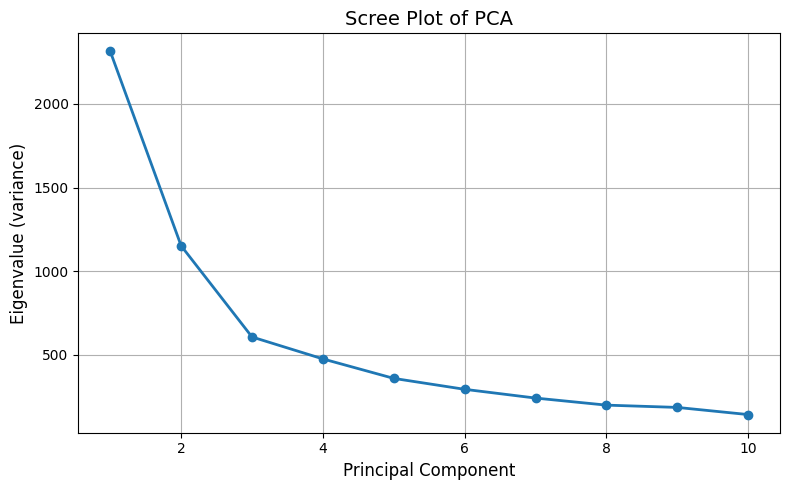

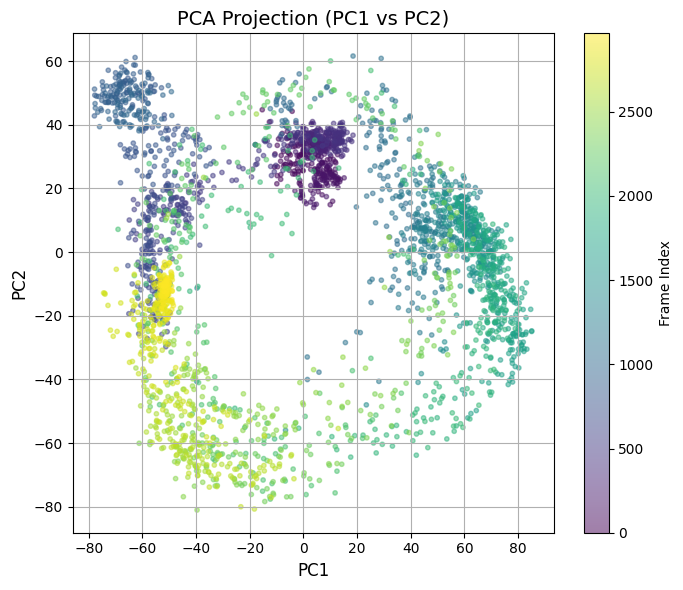

In [22]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 11), eigvals[:10], "o-", lw=2)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Eigenvalue (variance)", fontsize=12)
plt.title("Scree Plot of PCA", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()  # show in colab
plt.savefig("PCA_scree.png", dpi=1200, bbox_inches="tight")
plt.close()

# PC1 vs PC2 plot
plt.figure(figsize=(7, 6))
plt.scatter(proj[:, 0], proj[:, 1], alpha=0.5, s=10, c=np.arange(len(proj)))
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.title("PCA Projection (PC1 vs PC2)", fontsize=14)
plt.colorbar(label="Frame Index")
plt.grid(True)
plt.tight_layout()
plt.show()  # show in colab
plt.savefig("PCA_projection.png", dpi=1200, bbox_inches="tight")
plt.close()


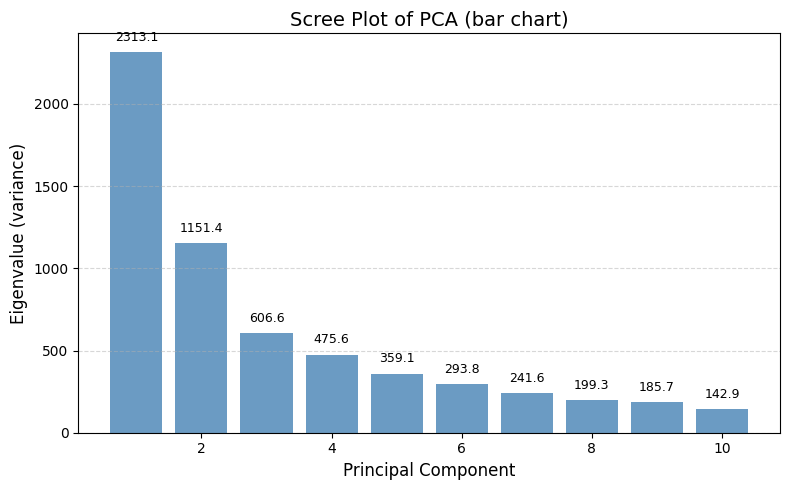

<Figure size 640x480 with 0 Axes>

In [26]:
# === Bar plot of PCA eigenvalues ===
plt.figure(figsize=(8,5))
plt.bar(np.arange(1, 11), eigvals[:10], color="steelblue", alpha=0.8)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Eigenvalue (variance)", fontsize=12)
plt.title("Scree Plot of PCA (bar chart)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Add values above bars
for i, val in enumerate(eigvals[:10]):
    plt.text(i+1, val+50, f"{val:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
plt.savefig("PCA_scree_bar.png", dpi=1200, bbox_inches="tight")

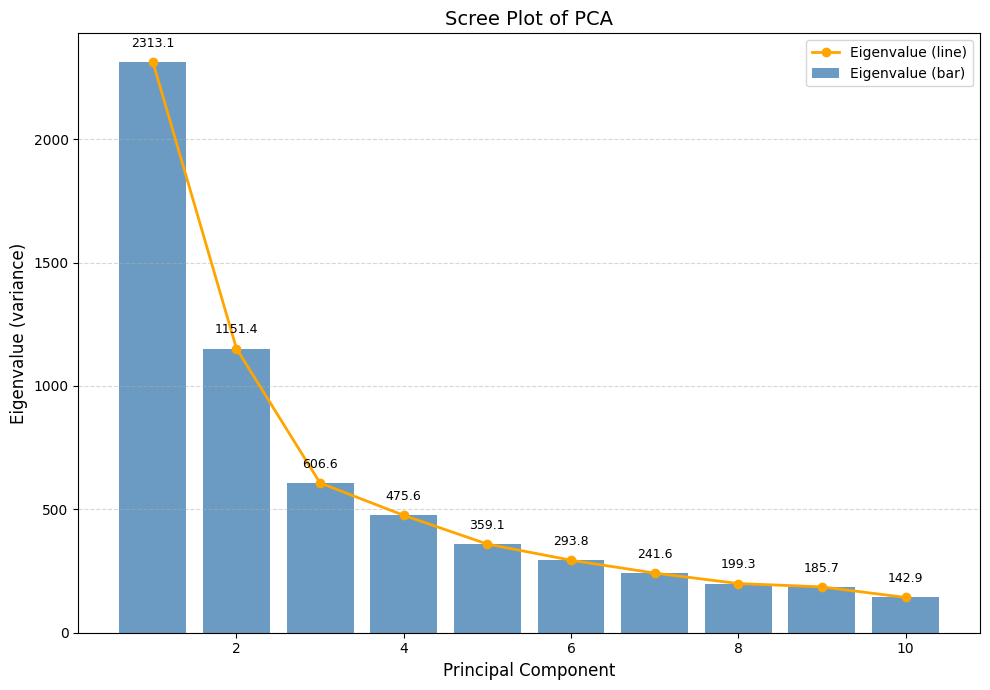

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'eigvals' is the array with the eigenvalues
eigvals = np.array([2313.1, 1151.4, 606.6, 475.6, 359.1, 293.8, 241.6, 199.3, 185.7, 142.9])

plt.figure(figsize=(10,7))

# Bar chart
plt.bar(np.arange(1, 11), eigvals, color="steelblue", alpha=0.8, label="Eigenvalue (bar)")

# Overlapping line graph
plt.plot(np.arange(1, 11), eigvals, color="orange", marker='o', linewidth=2, label="Eigenvalue (line)")

# Values ​​above the bars
for i, val in enumerate(eigvals):
    plt.text(i+1, val+50, f"{val:.1f}", ha='center', va='bottom', fontsize=9)

plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Eigenvalue (variance)", fontsize=12)
plt.title("Scree Plot of PCA", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("PCA_scree_bar_line.png", dpi=1200, bbox_inches="tight")
plt.show()

In [21]:
# ===== Download Figures =====
print("Saving and downloading figures...")
files.download("PCA_scree.png")
files.download("PCA_projection.png")

print("PCA analysis completed!")

Saving and downloading figures...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PCA analysis completed!


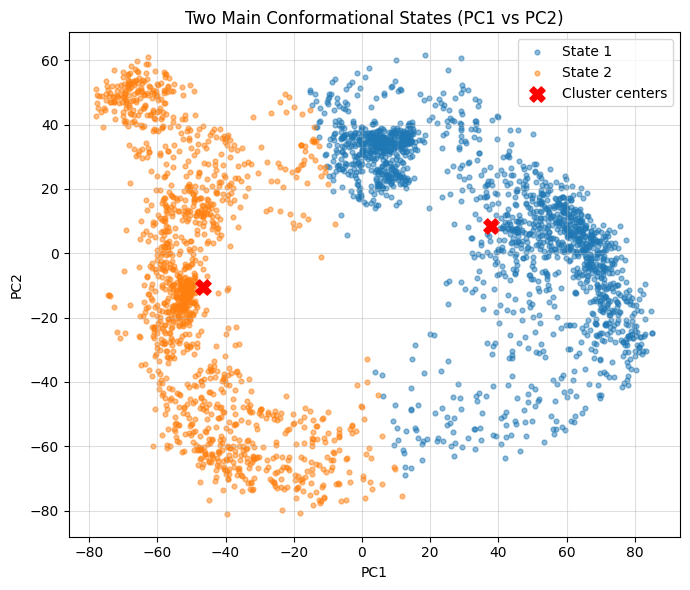

<Figure size 640x480 with 0 Axes>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# proj is the PCA projection array (N x 2: columns are PC1 and PC2)

# === Cluster into 2 states ===
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(proj[:, :2])

# Cluster centers
centers = kmeans.cluster_centers_

# === Plot filtered states ===
plt.figure(figsize=(7,6))
for i in range(2):
    mask = labels == i
    plt.scatter(proj[mask,0], proj[mask,1],
                s=12, alpha=0.5, label=f"State {i+1}")

# Highlight cluster centers
plt.scatter(centers[:,0], centers[:,1], c="red", s=120, marker="X", label="Cluster centers")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Two Main Conformational States (PC1 vs PC2)")
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()
plt.savefig("PCA_two_states.png", dpi=600, bbox_inches="tight")

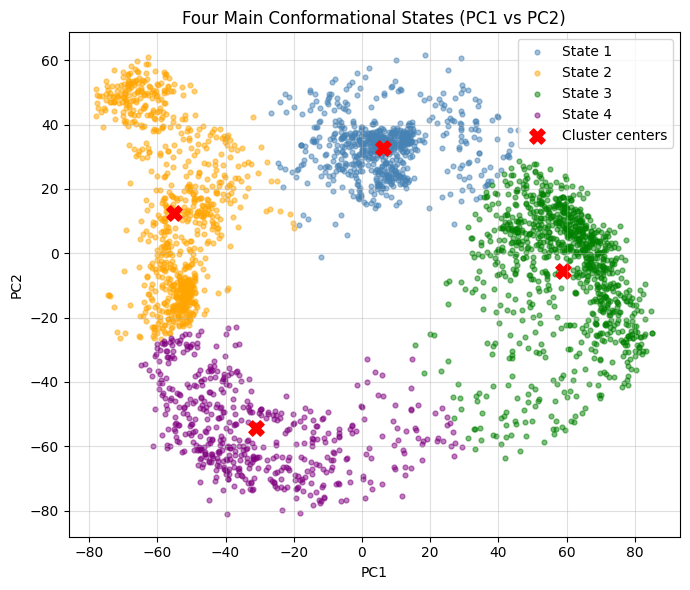

<Figure size 640x480 with 0 Axes>

In [28]:
# proj is the PCA projection array (N x 2: columns are PC1 and PC2)

# === Cluster into 4 states ===
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(proj[:, :2])

# Cluster centers
centers = kmeans.cluster_centers_

# === Plot filtered states ===
plt.figure(figsize=(7,6))
colors = ["steelblue", "orange", "green", "purple"]

for i in range(4):
    mask = labels == i
    plt.scatter(proj[mask,0], proj[mask,1],
                s=12, alpha=0.5, color=colors[i], label=f"State {i+1}")

# Highlight cluster centers
plt.scatter(centers[:,0], centers[:,1], c="red", s=120, marker="X", label="Cluster centers")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Four Main Conformational States (PC1 vs PC2)")
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()
plt.savefig("PCA_four_states.png", dpi=600, bbox_inches="tight")